# 4장 신경망 학습

- 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것.
- 학습의 목표: 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것. 
- 경사법: 함수의 기울기를 활용하여 손실함수의 값을 작게 만드는 기법
## 4.1 데이터에서 학습한다!

### 4.1.1 데이터 주도 학습 
- 사람: 사람의 경험과 직관을 단서로 시행착오를 거듭해 결과를 얻음
- 기계학습: 핵심은 데이터. 사람이 이미지를 벡터로 변환할 때 사용하는 특징(SVM, KNN 등)을 설계한 후, 그 특징의 패턴을 기계로 학습함. 문제에 적합한 특징을 설계하지 않으면 좋은 결과를 얻을 수 없다. 
- 신경망: 이미지에 포함된 중요한 특징도 기계가 스스로 학습하고, 주어진 문제의 패턴을 발견한다. 즉 모든 문제를 주어진 데이터 그대로 입력 데이터로 활용해 'end-to-end'로 학습한다. 



![](https://images.velog.io/images/guide333/post/1a2ff5a8-b2af-4237-ab25-9b3a0b0f097a/Screenshot%20from%202021-03-28%2017-52-09.png)

### 4.1.2 훈련 데이터와 시험 데이터
훈련 데이터에 포함되지 않은 새로운 데이터로도 문제를 올바르게 풀어내는 범용 능력을 제대로 평가하기 위해 훈련 데이터와 시험 데이터를 분리한다. 범용 능력을 획득하는 것이 기계학습의 최종 목표이다. 

- 훈련 데이터(training data): 최적의 매개변수 찾기
- 시험 데이터(test data): 훈련한 모델의 범용 능력 평가
- 오버피팅(overfitting): 한 데이터셋에만 지나치게 최적화된 상태. 오버피팅을 피해야 함. 

## 4.2 손실 함수
- 손실함수: 신경망 성능의 '나쁨'을 나타내는 지표. 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 못했느냐를 나타낸다. 손실함수를 기준으로 최적의 매개변수 값을 탐색한다. 일반적으로 평균 제곱 오차와 교차 엔트로피 오차를 사용한다. 

### 4.2.1 평균 제곱 오차(Mean Squared Error, MSE)
- 평균 제곱 오차의 수식: $E=\frac{1}{2} \sum_k (y_k-t_k)^2$          
($y_k$: 신경망의 출력(신경망이 추정한 값), $t_k$: 정답 레이블, $k$: 데이터의 차원수)

In [3]:
# '2'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  # 확률
# 정답
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # 정답: 2 

신경망의 출력 y는 소프트맥스의 함수의 출력이다. 소프트맥스 함수의 출력은 확률로 해석할 수 있다. 위의 그림에서 이미지가 0일 확률은 0.1, 1일 확률은 0.05로 해석된다. 정답 레이블인 t에서 정답을 의미하는 위치의 원소는 1, 그 외에는 0으로 표기(원-핫 인코딩)하므로 위의 그림에 따르면 정답이 '2'임을 알 수 있다. 

In [4]:
import numpy as np

def mean_squared_error(y, t): 
    return 0.5 * np.sum((y-t)**2)


In [5]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
# '7'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.05]
mean_squared_error(np.array(y), np.array(t))

0.59875

평군 제곱 오차를 기준으로는 첫 번째 추정 결과(오차가 더 작으므로)가 정답에 더 가까울 것으로 판단된다. 

### 4.2.2 교차 엔트로피 오차
- 교차 엔트로피 오차의 수식: $E=-\sum_k t_klogy_k$

($y_k$: 신경망의 출력(신경망이 추정한 값), $t_k$: 정답 레이블, $k$: 데이터의 차원수)

위의 식은 실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식이다. 예를 들어 정답 레이블이 '2'가 정답이고 이 때의 신경망 출력이 0.6이라면 교차 엔트로피 오차는 $-log0.6=0.51$이다. 같은 조건에서 신경망의 출력이 0.1이라면 $-log0.1=2.30$이다. 즉 교차 엔트로피 오차는 정답일 때의 출력이 전체값을 정한다.


![](https://images.velog.io/images/guide333/post/43fb1336-3f47-4112-80ac-8001f3132865/Screenshot%20from%202021-03-30%2000-38-15.png)

자연로그의 그래프에 의하면 정답에  해당하는 출력이 커질수록 0에 가까워지다가 출력이 1일 때 0이 된다. 정답일 때의 출력이 작아질수록 오차는 커진다.

In [7]:
def cross_entropy_error(y, t):            # y, t: 넘파이 배열
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

delta: log 함수에 0을 넣으면 마이너스 무한대인 -inf가 되어 계산을 할 수 없으므로 아주 작은 값을 더해 -Inf가 나오지 않도록 한다. 

In [14]:
# '2'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 정답 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [15]:
# '7'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.05]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

결과(오차값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단하였다. (평균 제곱 오차의 판단과 일치)

### 4.2.3 미니배치 학습
데이터가 N개일 때의 교차 엔트로피 함수: $E=-\frac {1}{N} \sum_n \sum_n t_{nk}log_{nk}$

$t_{nk}$: n번째 데이터의 k차원 째의 값

데이터 하나에 대한 손실함수를 N개의 데이터로 확장한 식이다. N으로 나눔으로써 '평균 손실 함수'를 구한다. 평균을 구하면 훈련 데이터의 개수와 상관없이 언제나 통일된 지표를 얻을 수 있다. 

- 미니배치 학습       
훈련 데이터가 많을 때, 데이터의 일부를 선택하여 전체의 '근사치'로 이용한다. 이 데이터의 일부를 '미니배치'라고 하며, 데이터의 일부를 선택하여 학습하는 것을 '미니배치 학습'이라고 한다. 

훈련 데이터에서 무작위로 몇 장을 뽑으려면 ```np.random.choice()```함수를 사용하면 된다. 이 함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용하면 된다.

손실함수도 미니배치로 계산한다.

In [31]:
import sys, os
#sys.path.append("./tensorflow_datasets") # 이때, dataset 폴더는 실행하는 py 파일의 경로와 일치해야 한다.
import numpy as np
import pickle
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf


from tensorflow.keras import datasets
mnist = datasets.mnist

(train_x, train_t),(test_x, test_t) = mnist.load_data()

print(train_x.shape)
print(train_t.shape)

(60000, 28, 28)
(60000,)


- 훈련 데이터에서 무작위로 10장 빼내기

In [32]:
train_size = train_x.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = train_x[batch_mask]
t_batch = train_t[batch_mask]

60000 미만의 수 중 무작위로 10개 골라낸다. 이 함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용한다.

In [33]:
np.random.choice(60000,10)

array([3490, 2178, 5554, 2609, 2794,  378, 5103, 1784, 5099,  191])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [35]:
# 정답이 원-핫 인코딩일 경우 교차 엔트로피 오차 구현

def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y)) / batch_size

y: 신경망의 출력, t: 정답 레이블     
- 코드 설명     
1. y가 1차원, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꾼다. 
2. 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

In [36]:
# 정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어졌을 때 교차 엔트로피 오차 구현

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로 그 계산은 무시한다. 즉 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다. 

- np.log(y[np.arange(batch_size), t]) 설명     
np.arange(batch_size): 0부터 batch_size-1까지 배열 생성
y[np.arange(batch_size), t]: 각 데이터의 정답 레이블에 해당하는 신경망의 출력 추출. [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]인 넘파이 배열 생성

### 4.2.5 왜 손실함수를 설정하는가?
신경망 학습에서 최적의 매개변수(가중치와 편향)을 탐색할 때 손실함수의 값을 작게하는 매개변수 값을 찾는다. 

- 신경망 학습의 방법      
1. 매개변수의 손실함수의 미분(기울기)를 계산한다.
2. 미분값을 단서로 매개변수 값을 갱신한다.
  - 미분값이 음수: 가중치의 매개변수를 양의 방향으로 변화 -> 손실함수의 값을 줄임   
  - 미분값이 양수: 가중치의 매개변수를 음의 방향으로 변화 -> 손실함수의 값 줄임 
  - 미분값이 0: 손실함수의 값이 변하지 않으므로 가중치 매개변수의 갱신은 멈춘다.

- 정확도를 지표로 삼으면 안 되는 이유     
미분값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다. 정확도는 매개변수의 작은 변화에는 거의 반응을 보이지 않고 반응이 있더라도 그 값이 불연속적으로 갑자기 변한다. 

그러나 손실함수는 매개변수의 값이 조금 변하면 손실 함수의 값도 연속적으로 변하기 때문에 손실함수로 지표를 삼는다. 

- 참고: 계단함수를 활성화 함수로 사용하지 않는 이유
정확도를 지표로 삼지 않는 이유는 '계단함수'를 활성화 함수로 사용하지 않는 이유와도 일맥상통한다. 계단 함수의 미분은 대부분의 장소(0 제외)에서 0이므로 계단 함수를 이용하면 손실 함수를 지표로 삼는 것이 아무 의미가 없다. 매개변수의 작은 변화를 계단 함수가 제거하기 때문에 손실함수의 값에 아무 변화가 없을 것이다. 

![](https://images.velog.io/images/guide333/post/dd009a59-c05f-4f42-8715-3e06dff7cccb/Screenshot%20from%202021-03-30%2000-53-20.png)

- 계단함수: 한순간의 변화
- 시그모이드 함수: 미분(접선)은 출력과 곡선의 기울기도 연속적으로 변한다. 즉 어느 장소에서도 미분값이 0이 되지 않는다. 

## 4.3 수치 미분
### 4.3.1 미분
- 미분: '한순간'의 변화량, 수식은 아래와 같다. 

$$ \frac {df(x)}{dx} = lim_{h \to 0} \frac {f(x+h)-f(x)}{h}$$

- 좌변: f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 변화량   
x의 작은 변화가 함수 f(x)를 얼마나 변화시키느냐의 의미 


In [ ]:
# 나쁜 구현의 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

- 수치미분의 문제점 2개 존재

> 수치 미분: 해석적 미분 방식으로는 풀 수 없는 문제가 있을 때 수치적 접근을 통해 근사 값을 찾는 방식. 아주 작은 차분으로 미분함으로써, 미분 공식과 근사적으로 가까운 결과를 낸다. (참고: https://chacha95.github.io/2018-11-01-numerical/)

1. 반올림 오차    
```h = 10e-50```로 설정했을 때, float32형(32비트 부동소수점으로 나타내면 0.0이 된다.
2. 함수의 차분(임의의 두 점에서의 함수 값의 차이)   
'진정한 미분'은 x 위치의 함수의 기울기(접선)이지만 위의 식에서의 미분은 (x+h)와 x 사이의 기울기이다. 즉 진정한 미분(진정한 접선)과 위의 식의 구현은 일치하지 않는다. 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해서 생기는 한계이다.

![](https://images.velog.io/images/guide333/post/678e921f-a349-4c8a-9eef-64d12cd0cf97/Screenshot%20from%202021-03-28%2021-43-30.png)

위 그림과 같이 수치 미분에는 오차가 포함되어 있으므로 오차를 줄이기 위해 중심 차분을 사용한다. 즉 $(x+h)$와 $(x-h)$일 때의 함수 f의 차분을 계산하는 방법을 사용한다. 

$$ \frac {df(x)}{dx} = lim_{h \to 0} \frac {f(x+h)-f(x-h)}{2h}$$

In [41]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001, 너무 작은 값을 넣으면 0.0으로 컴퓨터는 인식한다.
    return (f(x+h)-f(x-h)) /(2*h)

### 4.3.2 수치 미분의 예
$$y=0.01x^2 + 0.1x$$

위의 식을 계산한 미분 값은 x에 대한 f(x)의 변화량, 즉 기울기이다. 
- 해석적 해법: $\frac{df(x)}{dx} = 0.02x + 1$   
- 진정한 미분값    
x=5: $\frac{df(x)}{dx} =  0.2$, x=10: $\frac{df(x)}{dx} = 0.3$ 

아래의 값과 비교하면 오차가 매우 작다. 

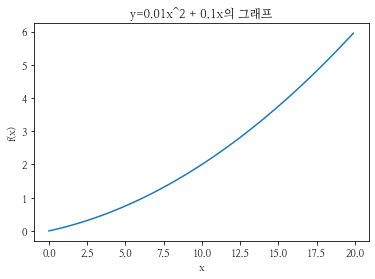

In [2]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 간격 0.1
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.title("y=0.01x^2 + 0.1x의 그래프")
plt.show()


In [42]:
numerical_diff(function_1, 5)

0.1999999999990898

In [43]:
numerical_diff(function_1, 10)

0.2999999999986347

- 수치 미분값을 기울기로 하는 직선    

![](https://images.velog.io/images/guide333/post/eff74320-7ae2-4cb9-858b-c3391cee530c/Screenshot%20from%202021-03-30%2001-17-05.png)

### 4.3.3 편미분
$$f(x_0, x_1) = x_0^2 + x_1^2$$

In [44]:
def function_2(x):          # X: 넘파이 배열
    return x[0]**2 + x[1]**2    # return np.sum(x**2)

![](https://images.velog.io/images/guide333/post/863f0bd5-f06a-4f3e-a092-f5b094e64f7e/Screenshot%20from%202021-03-28%2022-09-40.png)

- 편미분: 변수가 여럿인 함수에 대한 미분. $\frac {\partial f}{\partial x_0}$

- 편미분 구하기 
$x_0= 3, x_1=4$일 때 $x_0$에 대한 편미분 $\frac {\partial f}{\partial x_0}$ 구하기

In [48]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)
    

6.00000000000378

$x_0= 3, x_1=4$일 때 $x_0$에 대한 편미분 $\frac {\partial f}{\partial x_1}$ 구하기

In [49]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)
    

7.999999999999119

편미분은 특정 장소의 기울기를 구하지만 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수의 값을 고정한다. 

## 4.4 기울기
기울기: 모든 변수의 편미분을 벡터로 정의한 것. $(\frac {\partial f}{\partial x_0}, \frac {\partial f}{\partial x_1})$

In [52]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같고 원소가 모두 0인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산, 이해가 안 됨.... 
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  # 값 복원
        
    return grad

- 세 점에서의 기울기 구하기

In [53]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [54]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [55]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

- 아래의 그림은 기울길의 결과에 마이터스를 붙인 벡터 

![](https://images.velog.io/images/guide333/post/c6b414c5-e2c3-4813-b4b5-0d54a887eb5d/Screenshot%20from%202021-03-28%2022-28-33.png)

기울기 그림은 방향을 가진 벡터(화살표)로 그려진다. 기울기는 함수의 '가장 낮은 장소(최솟값)'을 가리키고, '가장 낮은 곳'에서 멀어질수록 화살표의 크기가 커진다. 

__기울기가 가리키는 쪽은 _각 장소_ 에서 함수의 출력값을 가장 줄이는 방향__ 이다. 

### 4.4.1 경사법(경사 하강법)
신경망은 손실함수가 최솟값이 될 때의 가중치와 편향을 학습할 때 찾아야 한다.
- 경사법: 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은값)을 찾는 것   

- 주의: 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.

>기울기가 0인 곳
>1. 극솟값: 국소적인 최솟값
>2. 최솟값
>3. 안장점(saddle point): 어느 방향에서는 극댓값이고 다른 방향에서는 극솟값인 점    
>
>복잡하고 찌그러진 모양의 함수의 경우, 평평한 곳으로 파고들면서 학습이 진행되지 않는 정체기(고원)에 빠질 수 있다.

- 경사법: 현 위치에서 기울어진 방향으로 일정 거리만큼 이동해 기울기를 구하고, 또 그 기울어진 방향으로 이동하는 것을 반복하면서 함수의 값을 점차 줄이는 방법이다. 

>경사법에는 경사하강법(최솟값 찾기)과 경사상승법(최댓값 찾기)가 있으나 신경망에서는 경사하강법을 주로 사용한다.

- 경사법의 수식    
$x_0 = x_0 - \eta \frac {\partial f}{\partial x_0}$
$x_1 = x_1 - \eta \frac {\partial f}{\partial x_1}$

$\eta$는 __학습률(lenaring rate)__ 이고 한 번의 학습에서 매개변수 값을 얼마나 갱신하느냐를 정한다. 

위의 식은 1회 갱신하는 양이고 이 단계를 반복하면서 서서히 함수의 값을 줄인다. 

학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해햐 하는데, 이 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없다. 신경망 학습에서는 보통 이 학습률 값을 변경하면서 제대로 학습하고 있는지를 확인하면서 진행한다.

In [56]:
# 경사하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x  # 초기값
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)  # 함수의 기울기
        x -= lr * grad
        
    return x

f: 최적화하려는 함수, init_x: 초깃값, lr: 학습률, step_num: 경사법에 따른 반복횟수

- 경사법으로 $f(x_0, x_1) = x_0^2 + x_1^2$의 최솟값 구하기

In [57]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

초기값 (-3.0, 4.0)으로 설정한 후, 경사법을 사용해 최솟값 탐색을 시작한다. 최종결과는 (0,0)에 가깝고, 진정한 최솟값은 (0,0)이므로 경사법으로 거의 정확한 결과를 얻었다. 

경사법을 사용한 갱신과정은 아래의 그림과 같이 된다. 값이 가장 낮은 장소인 원점에 점차 가까워지고 있다. 

![](https://images.velog.io/images/guide333/post/0f94c940-56c6-4e75-bc02-280cabf787f3/Screenshot%20from%202021-03-28%2023-03-05.png)

In [58]:
# 학습률이 너무 큰 예

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [59]:
# 학습률이 너무 작은 예

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)


array([-2.99999994,  3.99999992])

학습률이 너무 크면 큰 값으로 발산하고, 너무 작으면 거의 갱신되지 않고 학습이 끝난다. 따라서 학습률을 적절히 설정하는 것이 중요하다. 

> - 하이퍼파리미터: 사람이 직접 설정해야 하는 매개변수, 예: 학습률. 
> - 매개변수: 훈련데이터와 학습 알고리즘에 의해 '자동'으로 획득되는 매개변수, 예: 가중치, 편향

### 4.4.2 신경망에서의 기울기
신경망 학습에서도 기울기를 구해야 한다. 여기서의 기울기는 가중치 매개변수에 관한 손실 함수의 기울기이다. 

- 형상이 2x3, 가중치가 W, 손실함수가 L인 신경망에서 경사는 $\frac {\partial L}{\partial W}$이다. 

$$ W = \begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \end {pmatrix}$$

$$ \frac {\partial L}{\partial W} = \begin{pmatrix} \frac {\partial L}{\partial w_{11}}  & \frac {\partial L}{\partial w_{21}}  & \frac {\partial L}{\partial w_{31}}  \\  \frac {\partial L}{\partial w_{12}} & \frac {\partial L}{\partial w_{22}}  & \frac {\partial L}{\partial w_{32}}  \end {pmatrix}$$

$\frac {\partial L}{\partial W}$의 각 원소는 각각의 원소에 관한 손실함수 L의 편미분이다. 중요한 점은 $\frac {\partial L}{\partial W}$의 형상이 W와 같다는 것이다. 

In [60]:
# 신경망
# x: 입력 데이터, t: 정답레이블
import sys, os
sys.path.append(os.pardir)
import numpy as np

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규 분포로 초기화
        
    def predict(self, x):       # 예측
        return np.dot(x, self.W)
    
    def loss(self, x, t):       # 손실함수의 값 구하기
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(r, t)
        
        return loss

In [61]:
net = simpleNet()
print(net.W)       # 가중치 매개변수

[[ 0.48393713  1.40504059 -0.41674296]
 [-1.13322214 -1.4546533  -1.24281261]]


In [62]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.72953765 -0.46616362 -1.36857713]


In [63]:
np.argmax(p)

1

In [3]:
t = np.array([0,0,1]) # 정답 레이블
net.loss(x, t)

- 기울기 구하기 

In [4]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

## 4.5 학습 알고리즘 구현하기
- 신경망 학습의 절차
0. 전제: 신경망에는 적응 가능한 가중치와 편향이 있고, 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.
1. 미니배치    
훈련 데이터의 일부를 무작위로 가져온다. (미니배치의 손실 함수 값을 줄이는 것이 목표)
2. 기울기 산출   
각 가중치의 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다. 
3. 매개변수 갱신    
가중치 매개변수를 기울기 방향으로 조금씩 갱신한다.
4. 반복   
1-3단계 반복